## TUIA 4° cuatrimestre

# Minería de Datos

## Trabajo Práctico N°1

## Integrantes: Menescaldi Brisa, Vercesi Patricio

### 1. Importación de librerías y datos

In [ ]:
!pip install gap_stat -q
#!pip install plotly -q
#!pip install scikit-learn -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
import itertools

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score,silhouette_samples
from gap_statistic import OptimalK

**Seleccionar el dataset para subirlo:**

In [ ]:
files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


{'Crop_recommendation.csv': b'N,P,K,temperature,humidity,ph,rainfall,label\r\n90,42,43,20.87974371,82.00274423,6.502985292000001,202.9355362,rice\r\n85,58,41,21.77046169,80.31964408,7.038096361,226.6555374,rice\r\n60,55,44,23.00445915,82.3207629,7.840207144,263.9642476,rice\r\n74,35,40,26.49109635,80.15836264,6.980400905,242.8640342,rice\r\n78,42,42,20.13017482,81.60487287,7.628472891,262.7173405,rice\r\n69,37,42,23.05804872,83.37011772,7.073453503,251.0549998,rice\r\n69,55,38,22.70883798,82.63941394,5.70080568,271.3248604,rice\r\n94,53,40,20.27774362,82.89408619,5.718627177999999,241.9741949,rice\r\n89,54,38,24.51588066,83.53521629999999,6.685346424,230.4462359,rice\r\n68,58,38,23.22397386,83.03322691,6.336253525,221.2091958,rice\r\n91,53,40,26.52723513,81.41753846,5.386167788,264.6148697,rice\r\n90,46,42,23.97898217,81.45061596,7.50283396,250.0832336,rice\r\n78,58,44,26.80079604,80.88684822,5.108681786,284.4364567,rice\r\n93,56,36,24.01497622,82.05687182,6.98435366,185.2773389,rice\r

In [ ]:
df = pd.read_csv('Crop_recommendation.csv')

### 2. Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.) y elegir un método de estandarización.

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


#### Exploración de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Como podemos observar no hay valores faltantes.

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


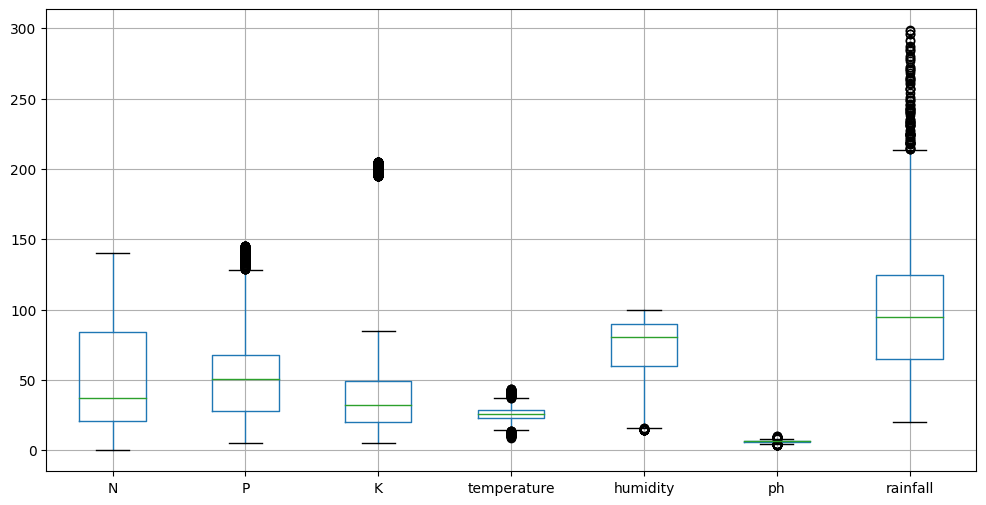

In [ ]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.show()

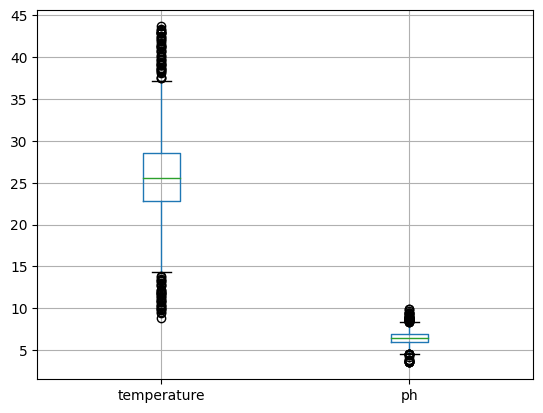

In [ ]:
# Para ver de más cerca las columnas con menos rango:
df[["temperature", "ph"]].boxplot()
plt.show()

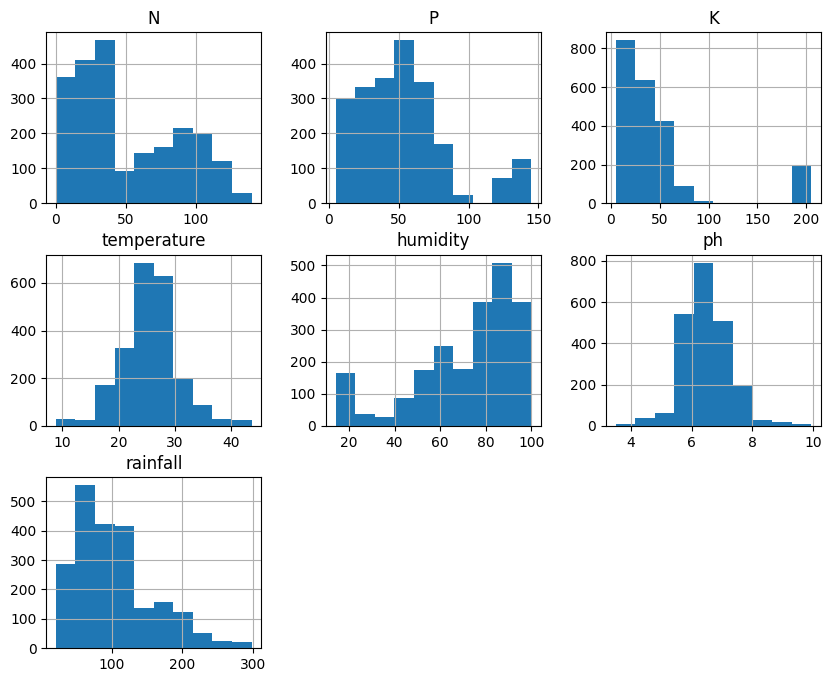

In [ ]:
df.hist(figsize=(10, 8))
plt.show()

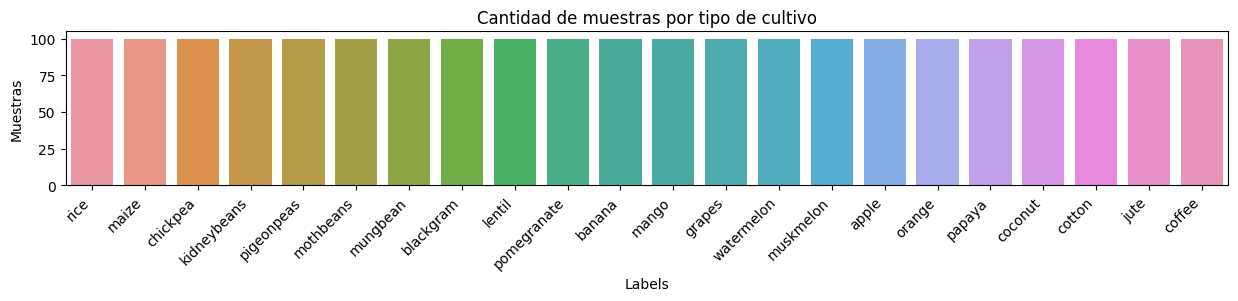

In [ ]:
# Chequeamos si hay outliers de la variable categórica:
plt.figure(figsize=(15, 2))
ax = sns.countplot(x='label', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Labels")
plt.ylabel("Muestras")
plt.title('Cantidad de muestras por tipo de cultivo')
plt.show()

Aunque los boxplots determinen ciertos datos como outliers, en los histogramas podemos ver que hay múltiples datos en todos los valores extremos y en realidad no son atípicos.

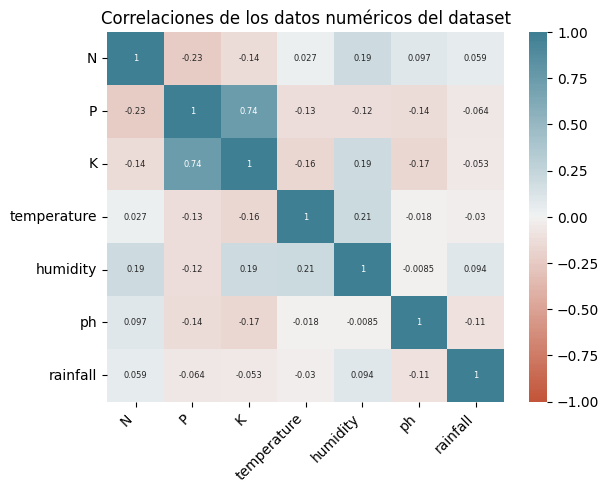

In [ ]:
corr = df.drop(columns=["label"]).corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), annot = True, annot_kws = {'size': 6})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Correlaciones de los datos numéricos del dataset")
plt.show()

Todas las características están bastante poco correlacionadas

#### Estandarización de los datos

Separaremos los atributos numéricos del que tiene labels porque no aplicaremos reducción de dimensionalidad sobre este último, sino que lo usaremos para observar cuan separadas quedan las categorías después de cada método.

In [ ]:
df_x = df.drop('label', axis=1)
df_y = df.label
unique_labels = df_y.unique()

Todos los atributos que quedan son numéricos y los escalaremos por Z-score

In [ ]:
x_s = StandardScaler().fit_transform(df_x)
x_s

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

### 3. PCA

#### Calculamos todas las componentes principales

In [ ]:
# Ajuste del modelo y transformación de los datos
pca = PCA(n_components = x_s.shape[1])
pca_features = pca.fit_transform(x_s)
# Guardamos las features en un dataframe
pca_df = pd.DataFrame(data=pca_features, columns=[f'PC{i+1}' for i in range(x_s.shape[1])])
pca_df['label'] = df_y
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-0.582869,-0.844586,1.373343,-1.614129,0.308224,-0.095997,-0.025239,rice
1,-0.474635,-0.784895,1.252178,-1.792762,1.107745,-0.532255,-0.280543,rice
2,-0.634068,-0.694522,1.179332,-1.818106,2.523263,-0.538551,-0.105967,rice
3,-1.047920,-1.087658,1.393351,-0.982401,1.448781,-0.656929,0.275272,rice
4,-0.873258,-0.658673,1.455685,-2.335012,1.959633,-0.318025,0.052740,rice


#### Averiguamos cuanta varianza explican para ver con cuáles nos quedamos

In [ ]:
pca_rtd = pd.DataFrame({'explained_variance_ratio':pca.explained_variance_ratio_}, index=pca_df.columns[:-1])
pca_rtd

,explained_variance_ratio
PC1,0.275888
PC2,0.184844
PC3,0.153787
PC4,0.146127
PC5,0.115133
PC6,0.096652
PC7,0.027569


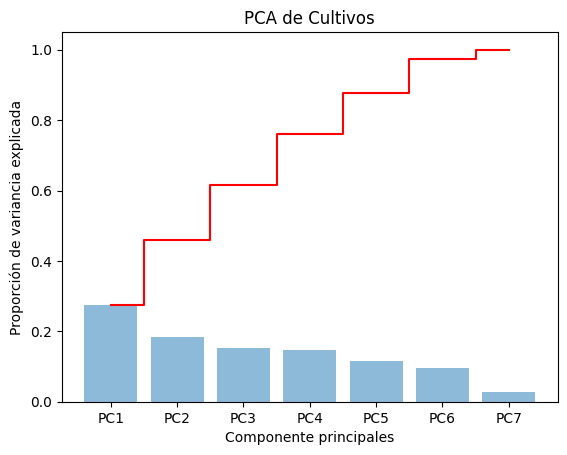

In [ ]:
plt.bar(pca_rtd.index, pca_rtd.explained_variance_ratio, alpha=0.5, align='center')
plt.step(pca_rtd.index, np.cumsum(pca_rtd.explained_variance_ratio), where='mid', color='red')
plt.title('PCA de Cultivos')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

Usando la regla del ~75%-80% de variancia acumulada explicada decidimos quedarnos con 4 componentes​

In [ ]:
pca_df_f = pca_df.drop(columns=["PC5", "PC6", "PC7"])
pca_df_f.head()

,PC1,PC2,PC3,PC4,label
0,-0.582869,-0.844586,1.373343,-1.614129,rice
1,-0.474635,-0.784895,1.252178,-1.792762,rice
2,-0.634068,-0.694522,1.179332,-1.818106,rice
3,-1.047920,-1.087658,1.393351,-0.982401,rice
4,-0.873258,-0.658673,1.455685,-2.335012,rice


#### Graficamos las 2 componentes principales sobre las características de los distintos cultivos

In [ ]:
fig = px.scatter(pca_df_f, x='PC1', y='PC2', color = pca_df_f["label"],  labels={'color': 'Tipo'})
fig.update_layout(title = 'Cultivos con Dimensiones Reducidas con PCA de 2 componentes')
fig.show()

### 4. Isomap

#### Análisis variando hiperparámetros

In [ ]:
# Creación de mapa de colores
label_color_mapping = {label: plt.cm.tab20(i) for i, label in enumerate(unique_labels)}
label_colors = [label_color_mapping[label] for label in df_y]

In [ ]:
p_n_neighbors = [2, 6, 12, 20]
p_n_components = [2, 3, 6]
# Creación de todas las combinaciones entre los elementos de cada lista
combinations = list(itertools.product(p_n_neighbors, p_n_components))

In [ ]:
# Para ignorar futuros warnings
import warnings
warnings.filterwarnings("ignore")
# Si se quieren volver a ver:
# warnings.filterwarnings("default")

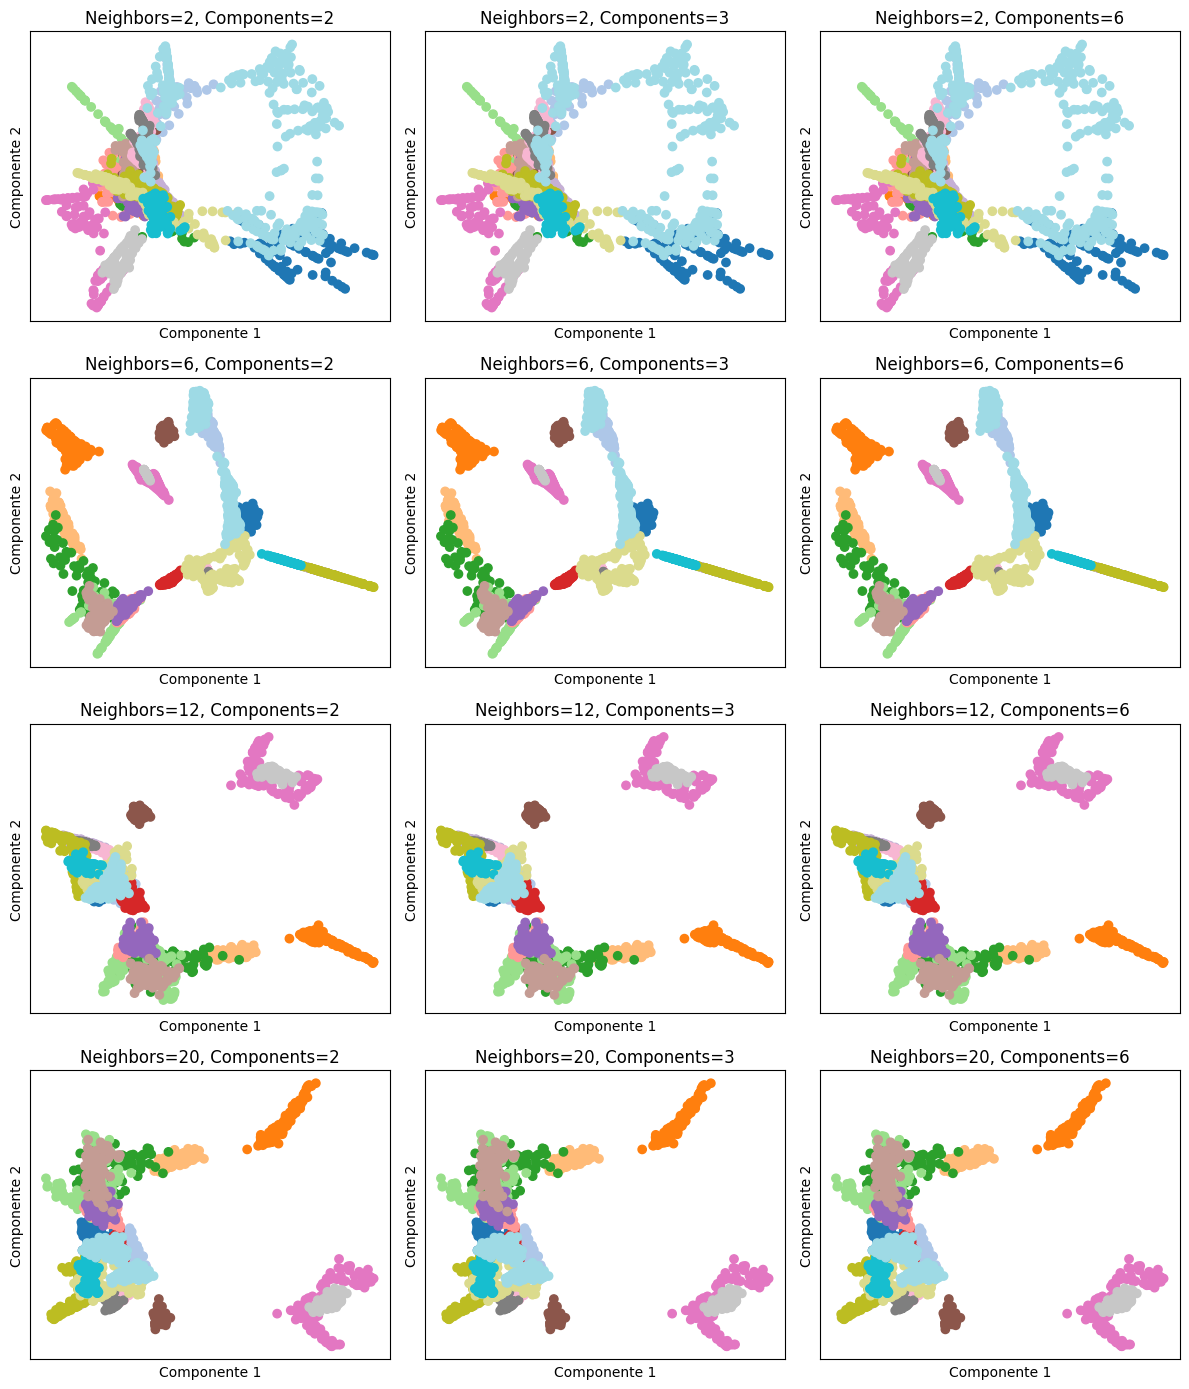

In [ ]:
# Ploteamos todas las combinaciones para compararlas
n_plots = len(combinations)
n_cols = 3

fig, axes = plt.subplots(nrows=n_plots//n_cols, ncols=n_cols, figsize=(12, 14))
axes = axes.flatten()

for i in range(n_plots):
    # Parámetros de combinación i
    combination = combinations[i]
    n_neighbors=combination[0]
    n_components=combination[1]

    # Ajuste(s) de modelo(s)
    iso = Isomap(n_neighbors=n_neighbors, n_components=n_components)
    transformed_data = iso.fit_transform(x_s)
    # Ploteo
    axes[i].scatter(transformed_data[:, 0], transformed_data[:, 1], c=label_colors)
    axes[i].set_title(f"Neighbors={n_neighbors}, Components={n_components}")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel('Componente 1')
    axes[i].set_ylabel('Componente 2')
plt.tight_layout()
plt.show()

Al ver los resultados de los datos reducidos dimensionalmente, algo importante a observar es que por alguna razón, el número de componentes no parece modificar el modelo final.

Y aunque es complicado decidir cuál es el mejor parámetro de cantidad de vecinos debido a la falta de un objetivo claro, podemos buscar una transformación de los datos en donde los diferentes tipos de cultivos esten más separados entre sí.

Teniendo eso en cuenta y aunque en todos los subplots hay bastante solapamiento, en el caso en el que los nodos se unen de a 6 vecinos es donde parece haber menor solapamiento.

Pero si en vez de eso quisiéramos mantener la mayor cantidad de varianza, quizás deberíamos de elegir otro modelo.

#### Mejor resultado graficado en más detalle

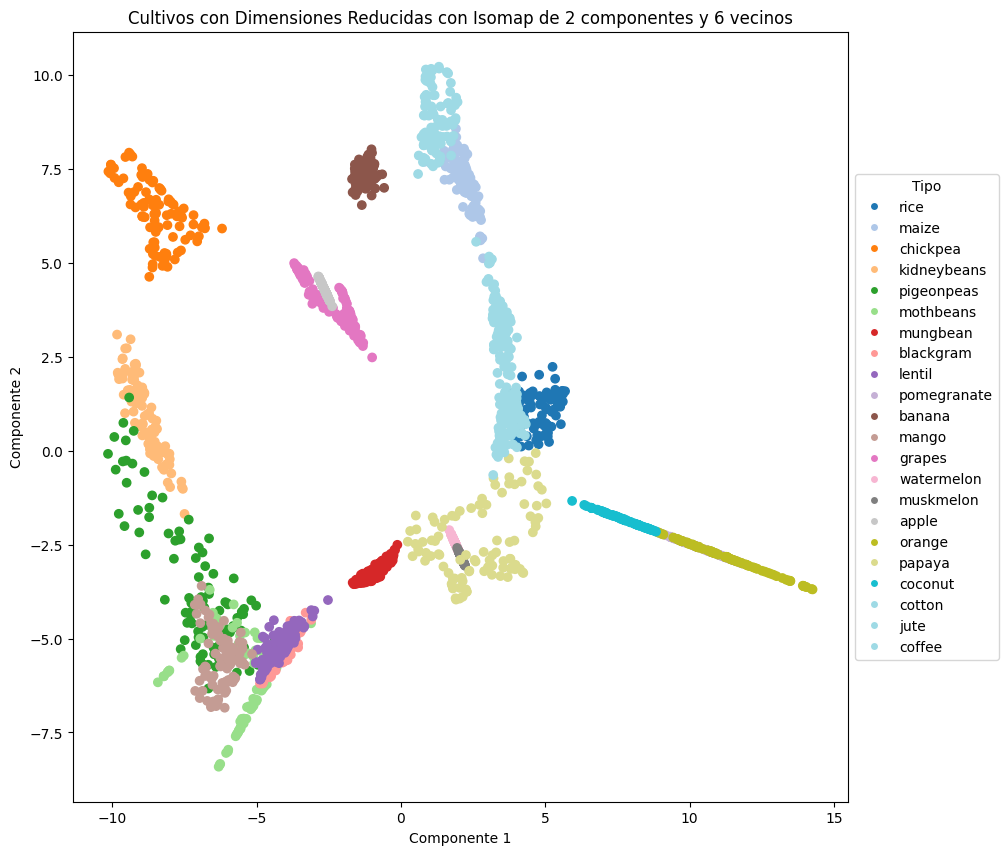

In [ ]:
# Entrenamiento del modelo
isomap = Isomap(n_neighbors=6, n_components=2)
transformed_data = isomap.fit_transform(x_s)

# Plot
plt.figure(figsize=(10, 10))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=label_colors)
plt.legend()
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=label_color_mapping[label], label=label) for label in unique_labels]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), handles=custom_legend, title='Tipo')
plt.title('Cultivos con Dimensiones Reducidas con Isomap de 2 componentes y 6 vecinos')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

### 5. t-SNE

#### Análisis variando hiperparámetros

In [ ]:
# Creación de mapa de colores
label_color_mapping = {label: plt.cm.tab20(i) for i, label in enumerate(unique_labels)}
label_colors = [label_color_mapping[label] for label in df_y]

In [ ]:
# Creación de iteraciones posibles
p_n_iter = [250, 300, 500]
p_n_components = [2, 3]
p_perplexities = [5, 30, 50]

# Creación de todas las combinaciones entre los elementos de cada lista
combinations = list(itertools.product(p_n_iter, p_n_components, p_perplexities))

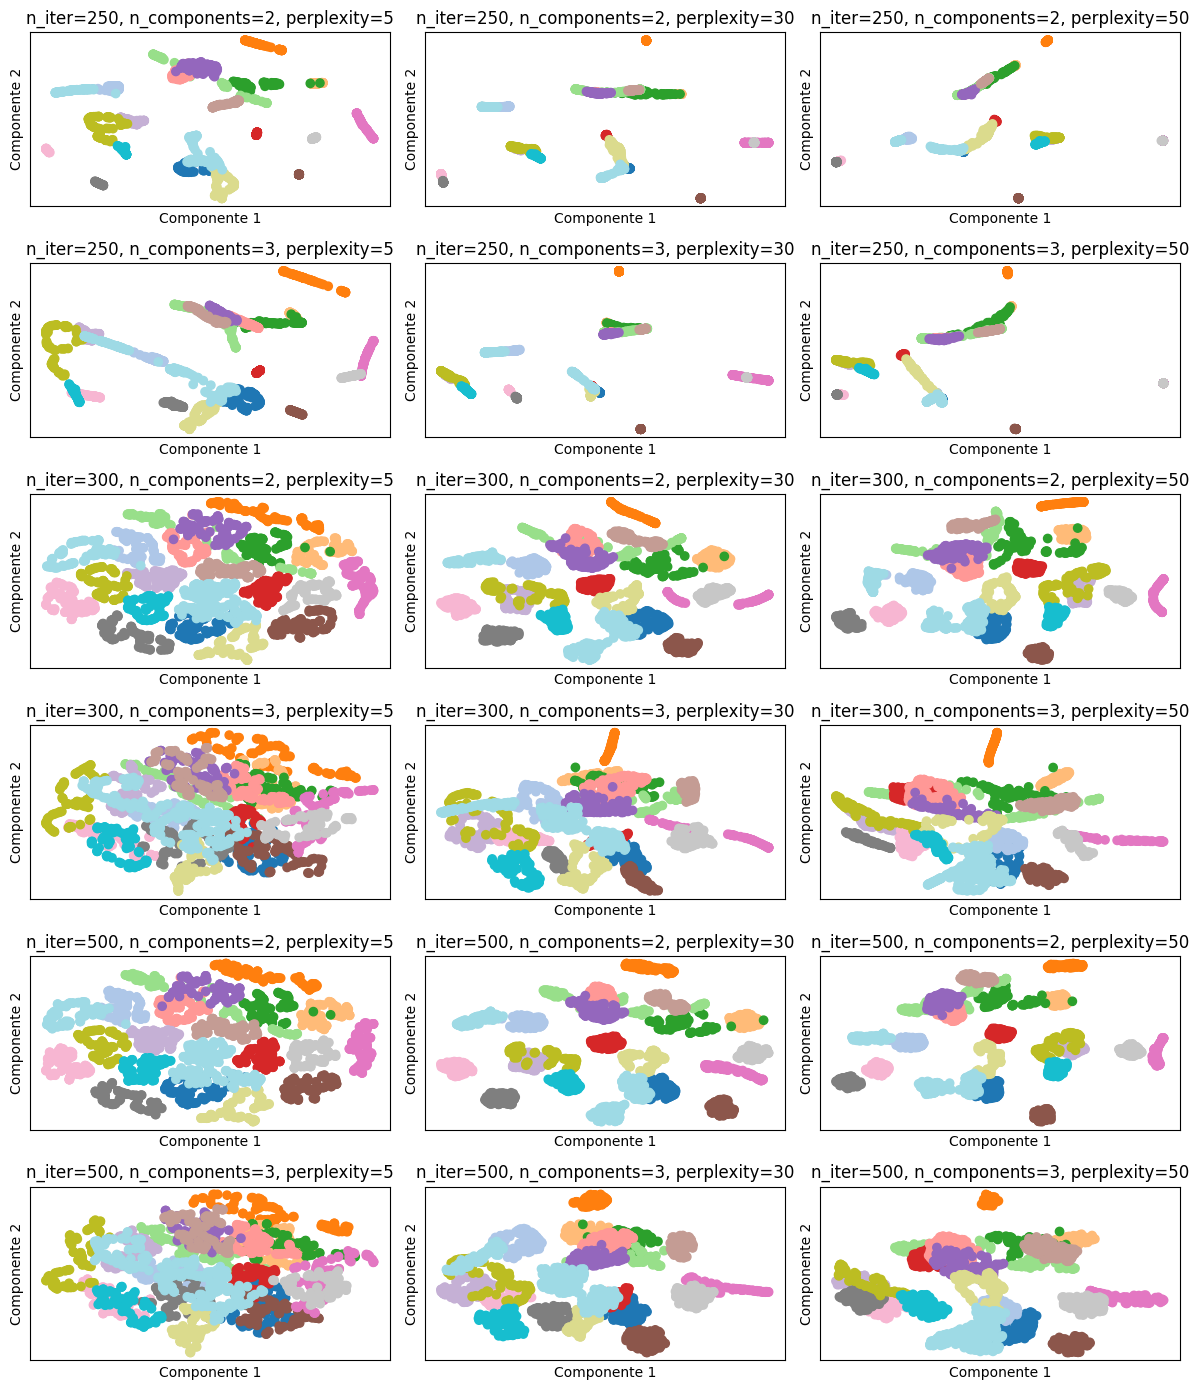

In [ ]:
# Ploteamos todas las combinaciones para compararlas
n_plots = len(combinations)
n_cols = 3

fig, axes = plt.subplots(nrows=n_plots//n_cols, ncols=n_cols, figsize=(12, 14))
axes = axes.flatten()

for i in range(n_plots):
    # Parámetros de combinación i
    combination = combinations[i]
    n_iter=combination[0]
    n_components=combination[1]
    perplexity=combination[2]

    # Ajuste(s) de modelo(s) y transformación de los datos
    tsne = TSNE(n_iter=n_iter, n_components=n_components, perplexity=perplexity)
    X_embedded = tsne.fit_transform(x_s)

    # Plot
    axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], c=label_colors, label='t-SNE Embedding')
    axes[i].set_title(f'n_iter={n_iter}, n_components={n_components}, perplexity={perplexity}')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel('Componente 1')
    axes[i].set_ylabel('Componente 2')
plt.tight_layout()
plt.show()

Al igual que con el Isomap, la elección del resultado de un modelo como mejor que otro es un proceso subjetivo.

Si nos basamos en los labels originales como por los que debería agrupar, podemos ver que los mejores resultados parecen ser los que tienen perplejidad 5, 500 iteraciones, y 2 componentes. En otras palabras, según las pruebas que hicimos, menor perplejidad y mayor cantidad de iteraciones parece producir modelos que transforman mejor el dataset en sólo 2 dimensiones.

Quizás, si quisiéramos elegir un modelo que contenga la mayor cantidad de varianza respecto al original, deberíamos elegir otro modelo.

#### Mejor resultado graficado en más detalle

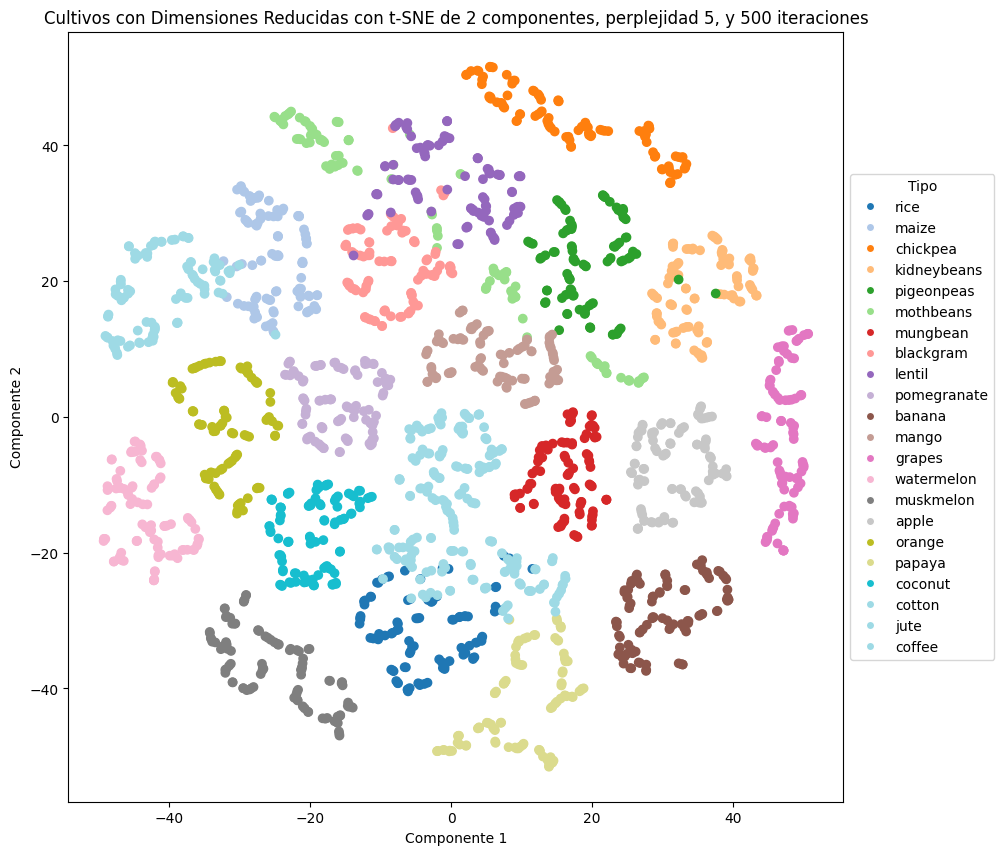

In [ ]:
# Ajuste del modelo y transformación los datos
tsne = TSNE(n_iter=500, n_components=2, perplexity=5)
X_embedded = tsne.fit_transform(x_s)

# Plot
plt.figure(figsize=(10, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=label_colors)
plt.legend()
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=label_color_mapping[label], label=label) for label in unique_labels]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), handles=custom_legend, title='Tipo')
plt.title('Cultivos con Dimensiones Reducidas con t-SNE de 2 componentes, perplejidad 5, y 500 iteraciones')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

### 6. K-Means

#### Análisis de K-means con distinto número de grupos

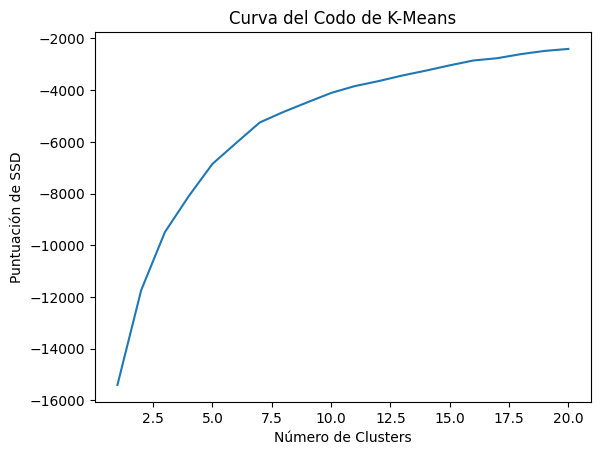

In [ ]:
Nc = range(1, clusters_max+1)
kmeans = [KMeans(n_clusters=i, n_init = 10) for i in Nc]
kmeans_fitted = [kmeans[i].fit(x_s) for i in range(clusters_max)]
scores = [kmeans_fitted[i].score(x_s) for i in range(clusters_max)]

plt.plot(Nc, scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de SSD')
plt.title('Curva del Codo de K-Means')
plt.show()

Podemos ver como al aumentar la cantidad de clusters, la puntuación de K-Means aumenta, ya que la sumatoria de las distancias entre los centroides de los clusters y los datos disminuye.

Si nos guiáramos por la regla del codo, nos quedaríamos con 7 u 8 clusters.

#### Cálculo de cantidad de grupos óptimo

In [ ]:
gs_obj = OptimalK(n_jobs=1, n_iter= 10, random_state = 42)
n_clusters = gs_obj(x_s, n_refs=50, cluster_array=np.arange(1, clusters_max+1))
n_clusters

/usr/local/lib/python3.10/dist-packages/scipy/cluster/vq.py:602: UserWarning:

One of the clusters is empty. Re-run kmeans with a different initialization.



20

El método GAP decidió el número máximo de clusters que le indicamos que podía elegir. Que es una cantidad de clusters mayor a la que nos hubiésemos quedado en caso de usar el método del codo.

#### Ajuste de modelo tipo K-means

In [ ]:
# Buscamos la asignación de clusters de el modelo ya entrenado de la cantidad de clusters que nos interesa
cluster_assignments = kmeans_fitted[n_clusters-1].predict(x_s) + 1

#### Gráfico en 3D

In [ ]:
fig = px.scatter_3d(df, x='N', y='P', z='K', color=cluster_assignments, labels={'color': 'Cluster'})
fig.update_layout(title='K-Means Clustering de cultivos ploteado según 3 de sus componentes')
fig.show()

#### Silhouette Score

In [ ]:
silhouette_score(x_s, cluster_assignments)

0.3434493084798059

### 7. Clustering Jerárquico

#### Cálculo de cantidad de clústeres óptimos

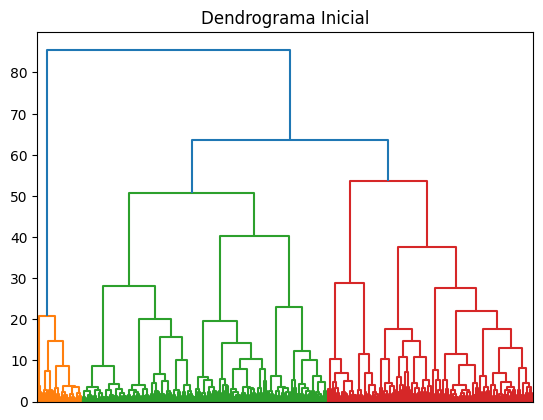

In [ ]:
linkage_matrix = linkage(x_s, "ward")
dendrogram(linkage_matrix, no_labels = True)
plt.title("Dendrograma Inicial")
plt.show()

Podemos observar contando que luego de las agrupaciones de los datos en 10 clusters la diferencia entre las alturas de las divisiones en más clusters parece reducirse bastante, por lo tanto tomamos 10 como límite máximo de clusters con los que vamos a testear.

In [ ]:
clusters_max = 10

Método GAP

In [ ]:
gs_obj = OptimalK(n_jobs=1, n_iter=40, random_state = 42)
n_clusters = gs_obj(x_s, n_refs=60, cluster_array=np.arange(2, clusters_max+1))
n_clusters

10

#### Ajuste de modelo de clustering aglomerativo

In [ ]:
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_assignments = clustering.fit_predict(x_s) + 1

#### Dendrograma final

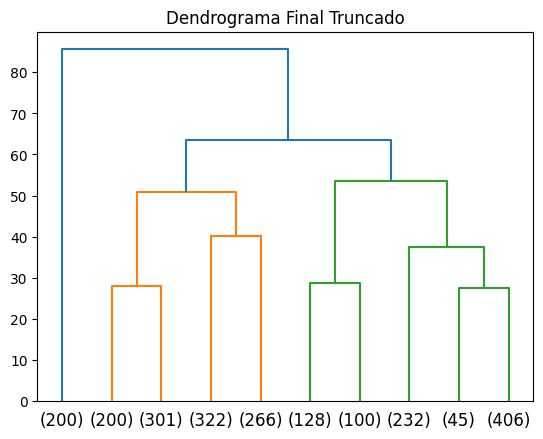

In [ ]:
linkage_matrix = linkage(x_s, "ward")
dendrogram(linkage_matrix, truncate_mode = 'lastp', p = n_clusters, show_leaf_counts = True)
plt.title("Dendrograma Final Truncado")
plt.show()

#### Gráfico en 3D pintado por clúster

In [ ]:
fig = px.scatter_3d(df, x='N', y='P', z='K', color=cluster_assignments, labels={'color': 'Cluster'})
fig.update_layout(title='Clustering Aglomerativo de cultivos ploteado según 3 de sus componentes')
fig.show()

#### Silhouette score

In [ ]:
silhouette_score(x_s, cluster_assignments)

0.33372442268868635

### Conclusiones


#### Reducciones de dimensionalidad

Viendo los resultados de las reducciones de dimensionalidades de PCA, Isomap y t-SNE en 2 dimensiones, y juzgándolos por cuan bien distribuyen los distintos tipos de cultivos separados por grupos, el claro ganador es t-SNE, que puede ser un indicativo de que hay similitudes locales en el espacio de alta dimensionalidad de los datos.

Además, el hecho de que podamos ver bien los tipos de cultivos separados en grupos, sin haberle pasado dichos datos, significa que es una característica valiosa que puede aportar información sobre las demás.

Por otro lado, no hay una forma objetiva de juzgar este tipo de resultados, y si se tuviese otro objetivo con la reducción de dimensionalidad entonces el modelo más adecuado podría ser otro.

#### Agrupaciones

Comparando los Silhouette Score de ambos modelos que obtuvimos, K-Means (≈ 0.346) y Clustering Jerárquico (≈ 0.322), podemos ver que:
1. No encontró clusters que diesen puntuaciones altas, cosa que puede deberse a la naturaleza de los datos, o que deberíamos haber probado con más hiperparámetros.
2. No hay casi diferencia entre la performance de ambos modelos pero es preferible el K-Means (aunque es probable que se deba al mayor número de clusters que le dimos como parámetro).

Se podría haber reducido la cantidad de dimensiones de los datos con t-SNE antes de intentar agruparlos, pero viendo que tampoco eran muchas características y que había muchas instancias de entrenamiento, no creemos que los resultados se deban a la maldición de la dimensionalidad.